In [51]:
import csv
import re
import string
import requests
import urllib2
from bs4 import BeautifulSoup
from urllib2 import urlopen
from pprint import pprint
from time import sleep

def makesoup(url):
    return BeautifulSoup(urlopen(url).read())

def scrape_movie_page_dict(url, file_to_save_as):

    with open(file_to_save_as, "w") as f:
        try:
            categories = ["Movie Title", "Tomato-meter", "Audience Score", "Genres", "Director", "Actors"]
            writer = csv.DictWriter(f, delimiter = '\t', fieldnames = categories)
            writer.writeheader()

            jurassic_soup = makesoup(url)

            title = jurassic_soup.find("h1", {"class":"movie_title"}).text.strip()

            bigbox = jurassic_soup.find("div", {"id":"scorePanel"})

            tomato_meter_score = bigbox.find("div", {"class":"tab-content"})\
                      .find("div", {"class":"tomato-left"}).find("span", {"itemprop":"ratingValue"}).text

            ugly_audience_score = str(bigbox.find("div", {"class":"audience-score meter"})\
                                      .find("div", {"class":"meter-value"}).text.strip())
            clean_audience_score = re.match(r'^[0-9]+',ugly_audience_score).group()

            context_box = jurassic_soup.find("div", {"id":"main-content"}).find("table", {"class":"info"}).findAll("tr")

            genre_list = [i.span.text.encode('utf-8') for i in context_box[1]("a")]
            director = context_box[2].a.span.text.encode('utf-8')

            cast_box = jurassic_soup.find("div", {"class":"castSection borderTop"})
            actors = [i.find("div", {"class":"media-body"}).a.span.text.encode('utf-8') \
                      for i in cast_box.findAll("div", {"class":"cast-item media inlineBlock "})[:6]]

            master_dict = {}
            master_dict["Movie Title"] = title
            master_dict["Tomato-meter"] = tomato_meter_score
            master_dict["Audience Score"] = clean_audience_score
            master_dict["Genres"] = genre_list
            master_dict["Director"] = director
            master_dict["Actors"] = actors                                            

            writer.writerow(master_dict)
            list_of_everything.append(master_dict)
            print 'Done Scraping', title + "."
        except:
            pass


scrape_movie_page_dict('http://www.rottentomatoes.com/m/wedding_crashers/', 'MovieScrapeDict.csv')
print 'Done here.'
print example_list

Done Scraping Wedding Crashers (2005).
Done here.
[{'Genres': ['Comedy', 'Romance'], 'Audience Score': '70', 'Director': 'David Dobkin', 'Tomato-meter': u'75', 'Actors': [' Vince Vaughn', ' Owen Wilson', ' Christopher Walken', ' Rachel McAdams', ' Isla Fisher', ' Jane Seymour'], 'Movie Title': u'Wedding Crashers (2005)'}, {'Genres': ['Action & Adventure', 'Mystery & Suspense', 'Science Fiction & Fantasy'], 'Audience Score': '82', 'Director': 'Colin Trevorrow', 'Tomato-meter': u'71', 'Actors': [' Chris Pratt', ' Bryce Dallas Howard', " Vincent D'Onofrio", ' Judy Greer', ' Omar Sy', ' Jake M. Johnson'], 'Movie Title': u'Jurassic World (2015)'}, {'Genres': ['Comedy'], 'Audience Score': '79', 'Director': 'Steve Mims', 'Tomato-meter': u'100', 'Actors': [' Alex Dobrenko', ' Ashley Rae Spillers', ' Sam Eidson', ' Chris Doubek', ' Hugo Vargas-Zesati', ' Mallory Culbert'], 'Movie Title': u'Arlo and Julie (2015)'}]


In [2]:
#title_url_dict = {}

STEMURL = 'http://www.rottentomatoes.com'

URL = 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=c&page=50'

def get_urls_from_searchpage(url):

    search_soup = makesoup(url)

    for eachmovie in search_soup.find("ul", {"id":"movie_results_ul"}).findAll("li"):

        add_on_url = eachmovie.find("div", {"class":"media-body media-body-alt"}).a["href"]
        complete_url = STEMURL + add_on_url
        title = eachmovie.find("div", {"class":"media-body media-body-alt"}).a.text

        if eachmovie.find("span", {"class":"tmeter"}).text.strip() == "No Score Yet":
            continue

        title_url_dict[title] = complete_url 

    return title_url_dict
    
print 'Done here.'
# get_urls_from_searchpage(['http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=c&page=50'])
# pprint(title_url_dict)


Done here.


In [3]:
# url_list = [v for k,v in title_url_dict.items() if v != 'Nope.']
# pprint(url_list)

In [4]:
# scrape_movie_page_dict(url_list, 'MovieScrapeDict.csv')

In [5]:
#get the total number of pagecounts for each letter and digit search - make a dict

letter_digit_pagecount_dict = {}

for letter in string.ascii_lowercase:
    URL = 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search={0}&page=1'.format(letter)
    soupin = makesoup(URL)
    max_pages = soupin.ul['pagecount']
    letter_digit_pagecount_dict[letter] = max_pages

for digit in string.digits:
    URL = 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search={0}&page=1'.format(digit)
    soupin = makesoup(URL)
    max_pages = soupin.ul['pagecount']
    letter_digit_pagecount_dict[digit] = max_pages
    
print 'Done here.'

Done here.


In [6]:
shortened_pagecount_dict = {}
integer_dict = {k:int(v) for k,v in letter_digit_pagecount_dict.items()}
for i in integer_dict:
    if integer_dict[i] > 150:
        integer_dict[i] = 150

#pprint(integer_dict)
#print type(integer_dict.values()[0])

print 'Done here.'

Done here.


In [7]:
list_of_url_searchpages = []

for letter in string.ascii_lowercase:
    for pagecount in range(1, int(integer_dict[letter])+1):
        URL = 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search={0}&page={1}'.format(letter, pagecount)
        list_of_url_searchpages.append(URL)
        
for digit in string.digits:
    for pagecount in range(1, int(integer_dict[digit])+1):
        URL = 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search={0}&page={1}'.format(digit, pagecount)
        list_of_url_searchpages.append(URL)

print len(list_of_url_searchpages) 
print list_of_url_searchpages[:10]
print 'Done here.'
#26871 is the total search pages if i scoured all the search pages and didn't cap at 150

4255
['http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=1', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=2', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=3', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=4', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=5', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=6', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=7', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=8', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=9', 'http://www.rottentomatoes.com/search/ajax?searchtype=movie&search=a&page=10']
Done here.


In [14]:
# import pickle
# from thready import threaded

# title_url_dict = {}

# for i, n in enumerate(list_of_url_searchpages):
#     try:
#         get_urls_from_searchpage(n)
#         if (i+1) % 20 == 0:
#             with open('dict_rottom_url_listNEW.pkl', 'w') as picklefile:
#                 pickle.dump(title_url_dict, picklefile)
#             print 'Got URLs from', i+1, "of", len(list_of_url_searchpages), "total search pages."     
#         sleep(0.25)
#     except urllib2.URLError as e:
#         print e
#         pass
    
# print 'All done!'

Got URLs from 20 of 4255 total search pages.
Got URLs from 40 of 4255 total search pages.
Got URLs from 60 of 4255 total search pages.
Got URLs from 80 of 4255 total search pages.
Got URLs from 100 of 4255 total search pages.
Got URLs from 120 of 4255 total search pages.
Got URLs from 140 of 4255 total search pages.
Got URLs from 160 of 4255 total search pages.
Got URLs from 180 of 4255 total search pages.
Got URLs from 200 of 4255 total search pages.
Got URLs from 220 of 4255 total search pages.
Got URLs from 240 of 4255 total search pages.
Got URLs from 260 of 4255 total search pages.
Got URLs from 280 of 4255 total search pages.
Got URLs from 300 of 4255 total search pages.
Got URLs from 320 of 4255 total search pages.
Got URLs from 340 of 4255 total search pages.
Got URLs from 360 of 4255 total search pages.
Got URLs from 380 of 4255 total search pages.
Got URLs from 400 of 4255 total search pages.
Got URLs from 420 of 4255 total search pages.
Got URLs from 440 of 4255 total search

KeyboardInterrupt: 

In [ ]:
# from thready import threaded

# threaded(list_of_url_searchpages, get_urls_from_searchpage, num_threads = 10)

# print 'All done.'

In [13]:
#pprint(title_url_dict)

[]


13075


In [21]:
for i, n in enumerate(list_of_url_searchpages[2820:]):
    try:
        get_urls_from_searchpage(n)
        if (i+2820) % 20 == 0:
            with open('dict_rottom_url_list2.pkl', 'w') as picklefile2:
                pickle.dump(title_url_dict, picklefile2)
            print 'Got URLs from', i+2820, "of", len(list_of_url_searchpages), "total search pages."     
        sleep(0.25)
    except urllib2.URLError as e:
        print e
        pass
    
print 'All done!'

Got URLs from 2820 of 4255 total search pages.
Got URLs from 2840 of 4255 total search pages.
Got URLs from 2860 of 4255 total search pages.
Got URLs from 2880 of 4255 total search pages.
Got URLs from 2900 of 4255 total search pages.
Got URLs from 2920 of 4255 total search pages.
Got URLs from 2940 of 4255 total search pages.
Got URLs from 2960 of 4255 total search pages.
Got URLs from 2980 of 4255 total search pages.
Got URLs from 3000 of 4255 total search pages.
Got URLs from 3020 of 4255 total search pages.
Got URLs from 3040 of 4255 total search pages.
Got URLs from 3060 of 4255 total search pages.
Got URLs from 3080 of 4255 total search pages.
Got URLs from 3100 of 4255 total search pages.
Got URLs from 3120 of 4255 total search pages.
Got URLs from 3140 of 4255 total search pages.
Got URLs from 3160 of 4255 total search pages.
Got URLs from 3180 of 4255 total search pages.
Got URLs from 3200 of 4255 total search pages.
Got URLs from 3220 of 4255 total search pages.
Got URLs from

In [22]:
print len(title_url_dict)

15590


In [23]:
title_url_dict["D2: The Mighty Ducks"]

'http://www.rottentomatoes.com/m/d2_the_mighty_ducks/'

In [26]:
title_url_dict["Taken"]

'http://www.rottentomatoes.com/m/taken/'

In [28]:
with open("RottenTomatoesURLs.csv", "w") as f:
    headers = ["Movie Title", "Movie URL"]
    writer = csv.writer(f, delimiter = ",")
    writer.writerow(headers)
    for key, value in title_url_dict.items():
        writer.writerow([key.encode('utf-8'), value])
print 'Done here.'

Done here.


In [54]:
list_of_everything = []

for i, n in enumerate(title_url_dict.values()):
# for i, n in enumerate(['http://www.rottentomatoes.com/m/thin_man/']):
    try:
        scrape_movie_page_dict(n, 'MovieScrapeDict.csv')
        if (i+1)%50 == 0:
            with open('list_of_movie_info_dicts.pkl', 'w') as picklefile:
                pickle.dump(list_of_everything, picklefile)
            print 'Got info from', i+1, "of", len(title_url_dict.values()), "total URL pages."   
        sleep(0.2)
    except Exception as e:
        print e
        pass
        
# for i in title_url_dict.values()[:5]:
#     print i

Done Scraping The Thin Man (1934).
Done Scraping Everyone's Hero (2006).
Done Scraping Black Venus (Venus Noire) (2011).
Done Scraping Leningrad Cowboys Go America (1989).
Done Scraping 1,000 Times Good Night (2014).
Done Scraping Sheitan (Satan) (2006).
Done Scraping Poetry (2011).
Done Scraping Heights (2005).
Done Scraping Twin Warriors (Tai ji zhang san feng) (The Tai-Chi Master) (1984).
Done Scraping The Crazies (1973).
Done Scraping Chungking Express (1996).
Done Scraping The Last Mimzy (2007).
Done Scraping Cane Toads: An Unnatural History (1988).
Done Scraping Under Siege (1992).
Done Scraping The Road (2012).
Done Scraping Bloodworth (2011).
Done Scraping Elvira, Mistress of the Dark (1988).
Done Scraping Last Passenger (2014).
Done Scraping The Host (2013).
Done Scraping We Are Still Here (2015).
Done Scraping Western (2015).
Done Scraping Side Effects (2005).
Done Scraping The Human Centipede II (Full Sequence) (2011).
Done Scraping 28 Up (1985).
Done Scraping I'm the One Th

In [373]:
# print list_of_everything[4], '\n'

# list_of_everything[4]['Genres'] = [actor.decode('string_escape') for actor in list_of_everything[4]['Genres']]
# list_of_everything[4]['Actors'] = [actor.decode('string_escape') for actor in list_of_everything[4]['Actors']]





[{'Genres': ['Mystery & Suspense', 'Classics', 'Comedy'], 'Audience Score': '94', 'Director': ['W', '.', 'S', '.', '', 'V', 'a', 'n', '', 'D', 'y', 'k', 'e'], 'Tomato-meter': '97', 'Actors': ['William Powell', 'Myrna Loy', "Maureen O'Sullivan", 'Nat Pendleton', 'Minna Gombell', 'Porter Hall'], 'Movie Title': '[\'[\', "\'", \'W\', \'i\', \'l\', \'l\', \'i\', \'a\', \'m\', \'\', \'P\', \'o\', \'w\', \'e\', \'l\', \'l\', "\'", \',\', \'\', "\'", \'M\', \'y\', \'r\', \'n\', \'a\', \'\', \'L\', \'o\', \'y\', "\'", \',\', \'\', \'"\', \'M\', \'a\', \'u\', \'r\', \'e\', \'e\', \'n\', \'\', \'O\', "\'", \'S\', \'u\', \'l\', \'l\', \'i\', \'v\', \'a\', \'n\', \'"\', \',\', \'\', "\'", \'N\', \'a\', \'t\', \'\', \'P\', \'e\', \'n\', \'d\', \'l\', \'e\', \'t\', \'o\', \'n\', "\'", \',\', \'\', "\'", \'M\', \'i\', \'n\', \'n\', \'a\', \'\', \'G\', \'o\', \'m\', \'b\', \'e\', \'l\', \'l\', "\'", \',\', \'\', "\'", \'P\', \'o\', \'r\', \'t\', \'e\', \'r\', \'\', \'H\', \'a\', \'l\', \'l\', "\'", \']

In [167]:
#Cleaning the data - making it all strings and stripping unnecessary whitespace.

for i in list_of_everything:
    i['Actors'] = [actor.decode('string_escape').strip() for actor in i['Actors']]
    i['Tomato-meter'] = str(i['Tomato-meter'])
    i['Movie Title'] = str(i['Movie Title'])
    i['Director'] = [director.decode('string_escape').strip() for director in i['Director']]
    
    
print type(list_of_everything[2]['Movie Title'])
print 'Done Cleaning and Converting.'

<type 'str'>
Done Cleaning and Converting.


In [169]:
keys = list_of_everything[0].keys()

with open("doesthiswork2.csv", "w") as output:
    #categories = ["Movie Title", "Tomato-meter", "Audience Score", "Genres", "Director", "Actors"]
    dict_writer = csv.DictWriter(output, keys)
    dict_writer.writeheader()
    dict_writer.writerows(list_of_everything)
    
print 'Done here.'

Done here.


In [390]:
extraurls = ['http://www.rottentomatoes.com/m/aarakshan/',
           'http://www.rottentomatoes.com/m/sleeping_with_other_people/', 'http://www.rottentomatoes.com/m/save_the_last_dance/',
           'http://www.rottentomatoes.com/m/for_keeps/', 'http://www.rottentomatoes.com/m/1000642-all_quiet_on_the_western_front/',
           'http://www.rottentomatoes.com/m/chunhyangdyun_2000/', 'http://www.rottentomatoes.com/m/spartan/',
           'http://www.rottentomatoes.com/m/doomsdays/', 'http://www.rottentomatoes.com/m/fool_there_was/',
             'http://www.rottentomatoes.com/m/marci_x/', 'http://www.rottentomatoes.com/m/a-royal-scandal/', 
             'http://www.rottentomatoes.com/m/romancing_the_stone/', 'http://www.rottentomatoes.com/m/shes_all_that/',
             'http://www.rottentomatoes.com/m/bright_days_ahead/', 'http://www.rottentomatoes.com/m/pink_flamingos/', 
             'http://www.rottentomatoes.com/m/a_self_made_hero/', 'http://www.rottentomatoes.com/m/resident_evil_extinction/',
             'http://www.rottentomatoes.com/m/coffin_rock/', 'http://www.rottentomatoes.com/m/barry-munday/',
             'http://www.rottentomatoes.com/m/beware_the_gonzo/', 'http://www.rottentomatoes.com/m/one_day_in_september/',
             'http://www.rottentomatoes.com/m/sparrows_dance_2013/', 'http://www.rottentomatoes.com/m/1018315-scanners/',
             'http://www.rottentomatoes.com/m/broken-wings/', 'http://www.rottentomatoes.com/m/illuminata/',
             'http://www.rottentomatoes.com/m/air_america/', 'http://www.rottentomatoes.com/m/china_heavyweight_2012/',
             'http://www.rottentomatoes.com/m/let_me_in/', 'http://www.rottentomatoes.com/m/walking_on_sunshine/',
             'http://www.rottentomatoes.com/m/kid_for_two_farthings/', 'http://www.rottentomatoes.com/m/dancemaker/',
             'http://www.rottentomatoes.com/m/better_luck_tomorrow/', 'http://www.rottentomatoes.com/m/arlo_and_julie/',
             'http://www.rottentomatoes.com/m/a_mans_story_2011/']
print len(extraurls)

34


In [391]:
import pandas as pd

list_of_everything = []

with open("list_of_movie_info_dicts.pkl", 'r') as picklefile: 
    old_data = pickle.load(picklefile)

list_of_everything.extend(old_data)


for i, n in enumerate(extraurls):
    try:
        scrape_movie_page_dict(n, 'MovieScrapeDict.csv')
        with open('bigpicklefile.pkl', 'w') as picklefile2:
            pickle.dump(list_of_everything, picklefile2)
        sleep(0.2)
    except Exception as e:
        print e
        pass

print 'All done!'




# newpanda = pd.DataFrame(my_data)

# print newpanda.columns.values

# # for i in rottentomatoes_csv3.columns.values:
# #     if type(rottentomatoes_csv3[i][0]) is str:
# #         print rottentomatoes_csv3[i][0][0]
# #         rottentomatoes_csv3[i].map(lambda x: x.encode("ascii","ignore").strip())
# #         rottentomatoes_csv3 = rottentomatoes_csv3.apply(lambda x: x.decode('string_escape'))
# # 
# # print type(rottentomatoes_csv3[i][1]), i
# # #     rottentomatoes_csv[i].map(lambda x: x.encode("ascii","ignore").strip())

# print 'Done here.'

Done Scraping Aarakshan (2011).
Done Scraping Sleeping with Other People (2015).
Done Scraping Save the Last Dance (2001).
Done Scraping For Keeps (1988).
Done Scraping All Quiet on the Western Front (1930).
Done Scraping Chunhyangdyun (2000).
Done Scraping Spartan (2004).
Done Scraping Doomsdays (2015).
Done Scraping A Fool There Was (1915).
Done Scraping Marci X (2003).
Done Scraping A Royal Scandal (1945).
Done Scraping Romancing the Stone (1984).
Done Scraping She's All That (1999).
Done Scraping Bright Days Ahead (2014).
Done Scraping Pink Flamingos (1972).
Done Scraping A Self-Made Hero (1997).
Done Scraping Resident Evil: Extinction (2007).
Done Scraping Coffin Rock (2009).
Done Scraping Barry Munday (2010).
Done Scraping Beware the Gonzo (2011).
Done Scraping One Day in September (1999).
Done Scraping Sparrows Dance (2013).
Done Scraping Scanners (1981).
Done Scraping Knafayim Shvurot (Broken Wings) (2002).
Done Scraping Illuminata (1999).
Done Scraping Air America (1990).
Done

In [393]:
with open("bigpicklefile.pkl", 'r') as picklefile: 
    bigbaddata = pickle.load(picklefile)
    
bigbadpanda = pd.DataFrame(bigbaddata)
print 'Done here.'

Done here.


In [405]:
bigbadpanda['Tomato-meter'] = bigbadpanda['Tomato-meter'].astype(int)
bigbadpanda['Audience Score'] = bigbadpanda['Audience Score'].astype(int)

print "Tomato-meter distribs", '\n', bigbadpanda['Tomato-meter'].describe()
print '\n'
print "Audience Score distribs", '\n', bigbadpanda['Audience Score'].describe()

Tomato-meter distribs 
count    15032.000000
mean        61.146554
std         28.785893
min          0.000000
25%         38.000000
50%         67.000000
75%         86.000000
max        100.000000
Name: Tomato-meter, dtype: float64


Audience Score distribs 
count    15032.000000
mean        62.940261
std         20.622593
min          0.000000
25%         48.000000
50%         66.000000
75%         80.000000
max        100.000000
Name: Audience Score, dtype: float64


In [407]:
#rottentomatoes2_csv, newpanda, and bigbadpanda are the good dataframes.

In [427]:
bigbadpanda['Year'] = bigbadpanda['Movie Title'].str[-5:-1].astype(int)

print bigbadpanda['Movie Title'].iloc[0][-5:-1]

1934


In [451]:
import numpy as np

# at_least_5 = bigbadpanda['Tomato-meter'].size >= 5

#bigbadpanda['Tomato-meter'].value_counts()
#bigbadpanda['Audience Score'].value_counts()

bigbadpanda.groupby(['Year']).agg({'Tomato-meter':[np.size, np.mean, np.std]})

Tomato-meter                       
             size        mean        std
Year                                    
1902            1  100.000000        NaN
1903            1  100.000000        NaN
1914            1  100.000000        NaN
1915            4   95.000000  10.000000
1916            1   97.000000        NaN
1919            3   98.333333   2.886751
1920            6   95.333333   5.750362
1921            4   94.750000   6.184658
1922            5   95.800000   4.764452
1923            6   93.833333   7.547627
1924            4   97.500000   3.000000
1925           10   95.300000   7.944949
1926            3   86.333333  17.214335
1927           10   93.100000  10.928556
1928           15   89.133333  15.788181
1929            9   84.666667  19.254870
1930           13   93.461538   7.113548
1931           12   92.666667  13.398326
1932           23   89.086957  15.655127
1933           30   87.000000  18.201932
1934           17   91.058824  11.305256
1935           17   87.823529  14.305748
1936           30   83.100000  24.195112
1937           22   91.818182  10.576868
1938           16   94.000000  10.589303
1939           29   93.241379  10.639063
1940           31   91.096774  10.290302
1941           30   91.500000  15.749658
1942           31   89.774194  13.445469
1943           20   81.800000  18.173433
...           ...         ...        ...
1987          175   61.022857  27.903148
1988          176   56.755682  30.330041
1989          188   56.452128  30.592768
1990          177   54.299435  29.749630
1991          181   53.900552  30.226020
1992          187   57.540107  29.569896
1993          237   55.594937  29.989342
1994          232   48.375000  30.394547
1995          254   54.885827  27.804348
1996          280   54.046429  29.684385
1997          288   52.135417  28.466847
1998          298   53.516779  27.245512
1999          338   53.423077  28.562935
2000          363   53.677686  27.393656
2001          415   56.279518  27.159912
2002          444   55.490991  26.845136
2003          430   57.065116  27.835605
2004          470   55.457447  28.589613
2005          511   56.792564  27.627282
2006          617   55.716370  27.511785
2007          668   58.931138  28.200366
2008          548   58.023723  26.963469
2009          507   56.153846  28.569795
2010          530   60.211321  27.363766
2011          649   60.747304  28.781814
2012          721   59.975035  28.591557
2013          736   60.656250  27.203792
2014          773   61.650712  28.656797
2015          507   61.560158  29.211066
2016            2   53.500000  50.204581

[103 rows x 3 columns]

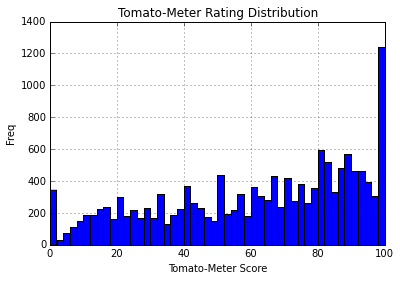

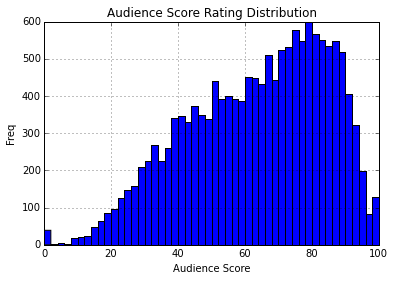

In [455]:
import matplotlib.pyplot as plt
%matplotlib inline

bigbadpanda['Tomato-meter'].hist(bins = 50)
plt.title("Tomato-Meter Rating Distribution")
plt.xlabel("Tomato-Meter Score")
plt.ylabel("Freq")
plt.show()

bigbadpanda['Audience Score'].hist(bins = 50)
plt.title("Audience Score Rating Distribution")
plt.xlabel("Audience Score")
plt.ylabel("Freq")
plt.show()

In [ ]:
# bigbadpanda.plot(kind = 'scatter', x="Year", y="Tomato-meter")
bigbadpanda.plot(kind = 'bar', x="Year", y="Audience Score")

print 'done here.'